In [11]:
#21BDS0125
#Luv Sachdeva
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/horse.csv'
horse_df = pd.read_csv(url)

In [12]:
dimensions = horse_df.shape

dimensions


(299, 28)

In [13]:
missing_data = horse_df.isnull().sum()

In [14]:
numerical_cols = horse_df.select_dtypes(include=['float64', 'int64']).columns
horse_df[numerical_cols] = horse_df[numerical_cols].fillna(horse_df[numerical_cols].median())

In [15]:
#categorical_cols = horse_df.select_dtypes(include=['object']).columns
#for col in categorical_cols:
#    horse_df[col] = horse_df[col].fillna(horse_df[col].mode()[0])

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler



In [20]:

url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/horse.csv"
dataset = pd.read_csv(url)

# Replace '?' with NaN
dataset.replace('?', np.nan, inplace=True)

# Convert columns to numeric where possible, turning non-numeric entries to NaN
dataset = dataset.apply(pd.to_numeric, errors='coerce')

# Check for missing values in the dataset
print("Missing values before imputation:\n", dataset.isna().sum())

# Fill missing values with mean for numeric columns and mode for categorical columns
for column in dataset.columns:
    if dataset[column].dtype == np.number:
        dataset[column].fillna(dataset[column].mean(), inplace=True)
    else:
        dataset[column].fillna(dataset[column].mode()[0], inplace=True)

# Verify that there are no missing values now
print("Missing values after imputation:\n", dataset.isna().sum())

# Prepare numeric dataset (exclude non-numeric columns if any)
numeric_dataset = dataset.select_dtypes(include=[np.number])


Missing values before imputation:
 surgery                  299
age                      299
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities      299
peripheral_pulse         299
mucous_membrane          299
capillary_refill_time    297
pain                     299
peristalsis              299
abdominal_distention     299
nasogastric_tube         299
nasogastric_reflux       299
nasogastric_reflux_ph    246
rectal_exam_feces        299
abdomen                  299
packed_cell_volume        29
total_protein             33
abdomo_appearance        299
abdomo_protein           198
outcome                  299
surgical_lesion          299
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                  299
dtype: int64
Missing values after imputation:
 surgery                  299
age                      299
hospital_number            0
rectal_temp        

<ipython-input-20-e6363371e6de>:15: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dataset[column].dtype == np.number:
<ipython-input-20-e6363371e6de>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna(dataset[column].mean(), inplace=True)
<ipython-input-20-e6363371e6de>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace meth

Remaining missing values in numeric_dataset before imputation:
 surgery                  299
age                      299
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities      299
peripheral_pulse         299
mucous_membrane          299
capillary_refill_time      0
pain                     299
peristalsis              299
abdominal_distention     299
nasogastric_tube         299
nasogastric_reflux       299
nasogastric_reflux_ph      0
rectal_exam_feces        299
abdomen                  299
packed_cell_volume         0
total_protein              0
abdomo_appearance        299
abdomo_protein             0
outcome                  299
surgical_lesion          299
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                  299
dtype: int64
Remaining missing values after imputation: 0
Clustering labels:
 [0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['surgery' 'age' 'temp_of_extremities' 'peripheral_pulse'
 'mucous_membrane' 'pain' 'peristalsis' 'abdominal_distention'
 'nasogastric_tube' 'nasogastric_reflux' 'rectal_exam_feces' 'abdomen'
 'abdomo_appearance' 'outcome' 'surgical_lesion' 'cp_data']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


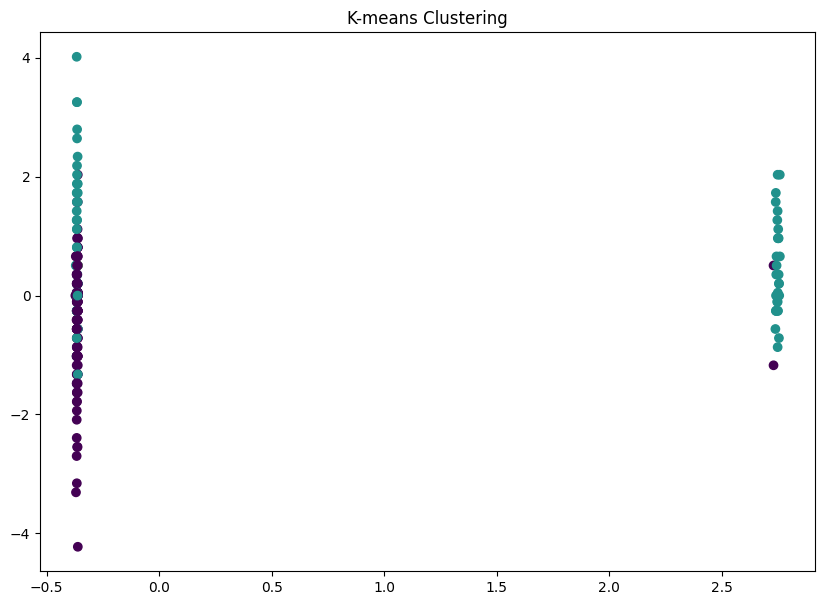

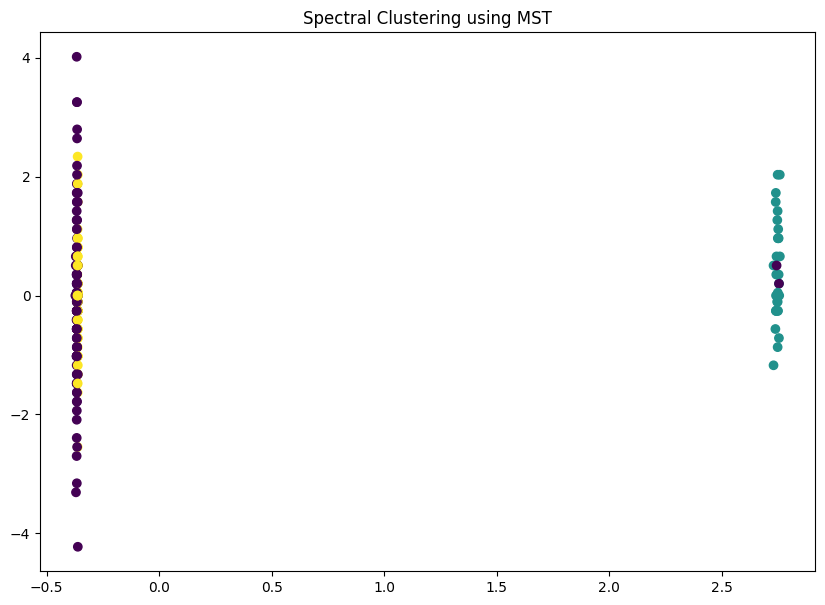

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Check for any remaining missing values
print("Remaining missing values in numeric_dataset before imputation:\n", numeric_dataset.isna().sum())

# Use SimpleImputer to fill any remaining NaNs with the mean
imputer = SimpleImputer(strategy='mean')
numeric_dataset_imputed = imputer.fit_transform(numeric_dataset)

# Verify that no NaN values remain
print("Remaining missing values after imputation:", np.isnan(numeric_dataset_imputed).sum())

# Standardize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_dataset_imputed)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=123).fit(scaled_data)
kmeans_labels = kmeans.labels_

print("Clustering labels:\n", kmeans_labels)

# Visualize K-means Clustering
plt.figure(figsize=(10, 7))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.show()

# Perform Spectral Clustering using MST
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=123)
sc_labels = sc.fit_predict(scaled_data)

# Visualize Spectral Clustering using MST
plt.figure(figsize=(10, 7))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=sc_labels, cmap='viridis')
plt.title('Spectral Clustering using MST')
plt.show()


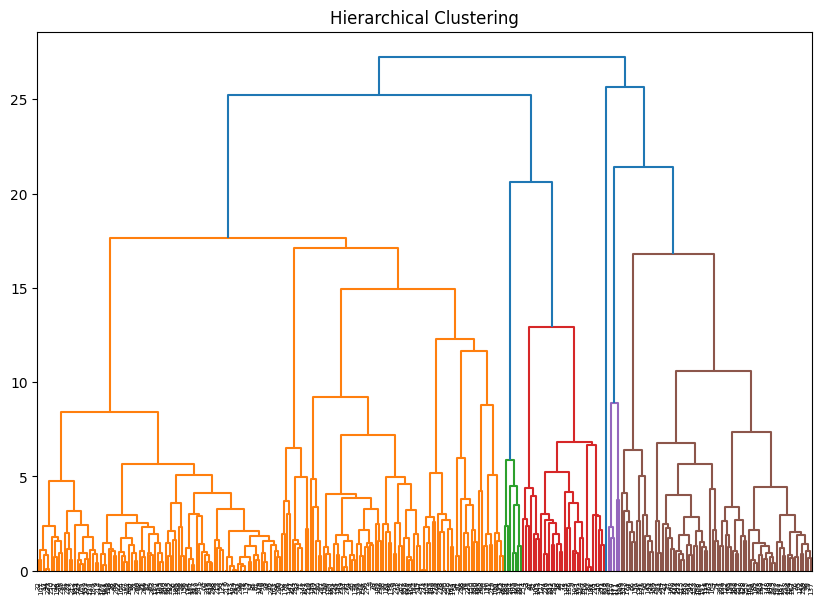

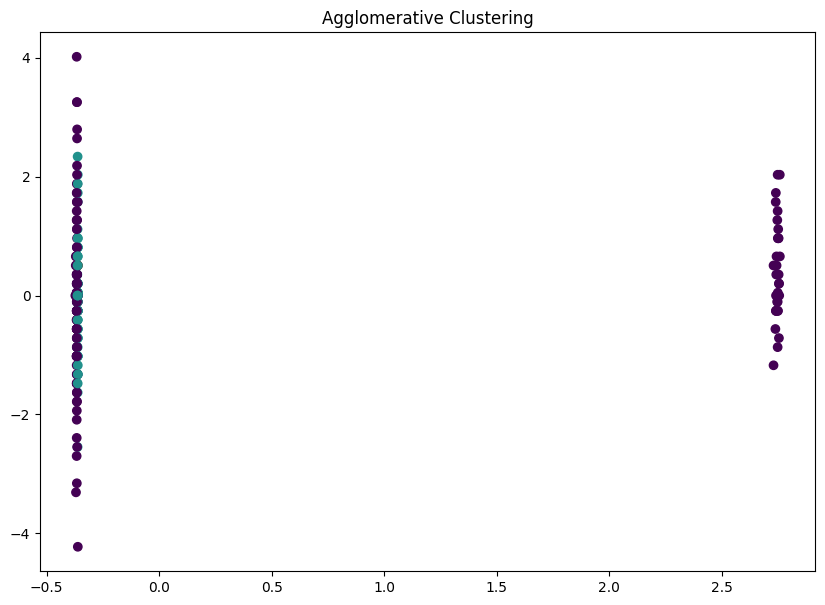

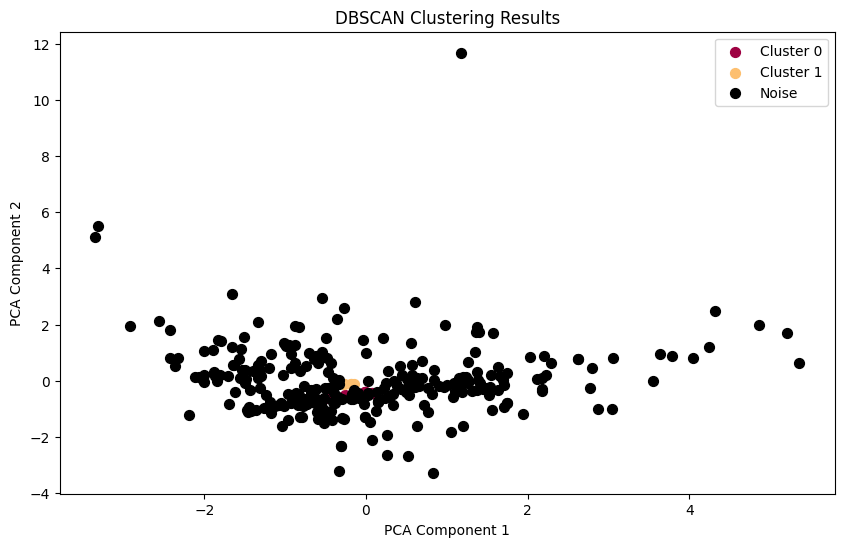

In [28]:
# Perform Hierarchical Clustering
linked = linkage(scaled_data, 'ward')

# Visualize the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering')
plt.show()

# Perform Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clust.fit_predict(scaled_data)

# Visualize Agglomerative Clustering
plt.figure(figsize=(10, 7))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=agg_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Step 4: Reduce to two dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Step 5: Plot the clusters
plt.figure(figsize=(10, 6))
unique_labels = set(dbscan_labels)

# Assign colors to clusters
for label in unique_labels:
    label_mask = dbscan_labels == label
    color = 'k' if label == -1 else plt.cm.Spectral(label / float(len(unique_labels)))
    plt.scatter(reduced_data[label_mask, 0], reduced_data[label_mask, 1],
                c=[color], label=f'Cluster {label}' if label != -1 else 'Noise', s=50)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering Results")
plt.legend()
plt.show()
